# 如何用Python探索星系觀測資料？
此notebook為[「用Python探索天文：從資料取得到視覺化」](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出。「用Python探索天文：從資料取得到視覺化」這本書是[「天文的資料科學」教育產品開發計畫](https://matters.news/@astrobackhacker/364036-%E5%A4%A9%E6%96%87%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E4%BE%86%E7%94%A8python%E6%8B%89%E8%BF%91%E6%88%91%E5%80%91%E8%88%87%E6%98%9F%E7%A9%BA%E7%9A%84%E8%B7%9D%E9%9B%A2-%E6%95%99%E8%82%B2%E7%94%A2%E5%93%81%E9%96%8B%E7%99%BC%E8%AA%BF%E6%9F%A5%E8%A1%A8%E5%96%AE-bafybeiahet2kggahd2wwst6flujiwkdwvg6wyiz23c4dtlgyvn2odhfdfi)的一部分，如果你想要體驗更多從資料產出天文新知識的旅程，歡迎填寫[這份調查表單](https://docs.google.com/forms/d/e/1FAIpQLSdSjnrvdsqAtALGfIMxXhQMZ9PRO-e_2ML6kzg6tjqyHNl1eA/viewform)，讓我能根據你的需求及建議，制定適合你的教學內容及呈現方式。

## (一) 哪些平台有將星系觀測資料開放給⼤眾使⽤？
以下列出幾個可以下載到星系觀測資料的平台：

### SkyServer SDSS
[SkyServer SDSS](https://skyserver.sdss.org)是一個用來查詢和下載[Sloan Digital Sky Survey(SDSS)](https://zh.wikipedia.org/wiki/%E5%8F%B2%E9%9A%86%E6%95%B8%E4%BD%8D%E5%B7%A1%E5%A4%A9)觀測資料的網站。SDSS是一個以美國新墨西哥州阿帕契點天文台的2.5公尺光學望遠鏡進行的巡天調查計畫。為了了解星系的分布、結構、形成和演化，SDSS收集了大量的天體影像和光譜資料。

### NASA/IPAC Extragalactic Database(NED)
[NED](https://ned.ipac.caltech.edu/)是由美國太空總署資助並由IPAC(Infrared Processing and Analysis Center)營運的天文資料庫，提供星系等銀河系外天體的資訊查詢及觀測資料下載服務。

### Mikulski Archive for Space Telescopes(MAST)
[MAST](https://archive.stsci.edu/)是一個天文觀測資料中心，專門存儲和管理多個太空及地面天文觀測計畫的資料。透過它的網站，你能夠搜尋並下載韋伯和哈伯太空望遠鏡所觀測的星系影像及光譜資料。

## (二) 如何用Python取得星系觀測資料？

[Astroquery](https://astroquery.readthedocs.io/en/latest/)是一個能串接不同天文資料庫服務以方便取得各種天文資料的Python套件。它提供多個模組，用於查詢不同的天文資料庫服務。其中，[sdss模組](https://astroquery.readthedocs.io/en/latest/sdss/sdss.html)是用來取得SDSS的資料，NED的資料能用[ipac.ned模組](https://astroquery.readthedocs.io/en/latest/ipac/ned/ned.html)取得，而[mast模組](https://astroquery.readthedocs.io/en/latest/mast/mast.html)則可以取得MAST的資料。執行以下指令以安裝Astroquery：

In [ ]:
pip install -U --pre astroquery

### 範例1：使用ipac.ned模組來查詢星系的基本資訊、影像及光譜資料

In [1]:
# 引入ipac.ned模組中的Ned類別，用於查詢NASA/IPAC Extragalactic Database(NED)提供的星系資料
from astroquery.ipac.ned import Ned

# 定義要查詢的星系名稱
galaxy_name = 'M104'

# 使用Ned物件的query_object()方法來查詢星系的基本資訊
ned_query_result_table = Ned.query_object(galaxy_name)
print(f'{galaxy_name}星系基本資訊：')
print(ned_query_result_table)

# 使用Ned物件的get_images_async()方法來取得星系的影像資料，它會回傳一個串列，其中每個元素代表不同的影像資料物件
ned_images = Ned.get_images_async(galaxy_name)

# 顯示第一個影像FITS檔案的資訊，並取出其影像的像素值資料
print('影像資料FITS檔案資訊：')
ned_images[0].get_fits().info()
print('影像的像素資料：')
ned_image_data = ned_images[0].get_fits()[0].data
print(ned_image_data)

# 使用Ned物件的get_spectra_async()方法來取得星系的光譜資料，它會回傳一個串列，其中每個元素代表不同的光譜資料物件
ned_spectra = Ned.get_spectra_async(galaxy_name)

# 顯示最後一個光譜FITS檔案的資訊，並取出其光譜資料
print('光譜資料FITS檔案資訊：')
ned_spectra[-1].get_fits().info()
print('光譜資料：')
ned_spectrum_data = ned_spectra[-1].get_fits()[1].data
print(ned_spectrum_data)

M104星系基本資訊：
No. Object Name     RA        DEC     Type  Velocity  ... Photometry Points Positions Redshift Points Diameter Points Associations
                 degrees    degrees          km / s   ...                                                                         
--- ----------- ---------- ---------- ---- ---------- ... ----------------- --------- --------------- --------------- ------------
  1 MESSIER 104  189.99763  -11.62305    G     1091.0 ...               357        95              40               7            0
影像資料FITS檔案資訊：
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     106   (424, 424)   int16   
影像的像素資料：
[[5313 5392 5392 ... 5436 5121 5121]
 [5156 5550 5235 ... 5436 5436 5279]
 [5471 5550 5865 ... 5751 5751 5909]
 ...
 [5361 5913 5598 ... 6378 5748 5748]
 [5361 5598 5283 ... 6378 5748 5748]
 [5283 5598 5913 ... 5984 5669 6142]]
光譜資料FITS檔案資訊：
Filename: (No file assoc

### 範例2：使用SDSS模組來取得星系的影像及光譜資料

In [2]:
# 引入sdss模組中的SDSS類別，用於查詢SDSS提供的星系資料
from astroquery.sdss import SDSS
# 從astropy套件引入SkyCoord類別，用於處理天體座標
from astropy.coordinates import SkyCoord

# 定義一個用於取得星系的(RA,DEC)座標的函式
def get_galaxy_coordinates(galaxy_name):
    try:
        # 使用SkyCoord的from_name()方法根據星系名稱查詢其座標
        galaxy_coordinates = SkyCoord.from_name(galaxy_name)
        return galaxy_coordinates
    except Exception as e:
        # 如果查詢過程中出現異常，輸出錯誤訊息並回傳None
        print(f'星系座標取得失敗，錯誤訊息： {e}')
        return None

# 定義一個用於取得SDDS提供的星系影像和光譜資料的函式
def fetch_sdss_data(galaxy_coordinates, data_type='both'):
    try:
        # 檢查data_type參數是否有效
        if data_type not in ['image', 'spectrum', 'both']:
            raise ValueError('data_type參數必須是"image"、"spectrum"或"both"其中之一')

        # 根據data_type參數的值，從SDSS資料庫中查詢影像資料
        if data_type in ['image', 'both']:
            sdss_images = SDSS.get_images(coordinates=galaxy_coordinates)
            if not sdss_images:
                print('未找到影像資料')
                sdss_images = None
        else:
            sdss_images = None
        
        # 根據data_type參數的值，從SDSS資料庫中查詢光譜資料
        if data_type in ['spectrum', 'both']:
            sdss_spectra = SDSS.get_spectra(coordinates=galaxy_coordinates)
            if not sdss_spectra:
                print('未找到光譜資料')
                sdss_spectra = None
        else:
            sdss_spectra = None
        
        return sdss_images, sdss_spectra
    except Exception as e:
        # 如果查詢過程中出現異常，輸出錯誤訊息並回傳None, None
        print(f'星系資料取得失敗，錯誤訊息： {e}')
        return None, None

# 設定要查詢的星系名稱
galaxy_name = 'NGC 7319'
# 取得星系座標
galaxy_coordinates = get_galaxy_coordinates(galaxy_name)  
print(f'{galaxy_name}星系的(RA, DEC)座標：{galaxy_coordinates}')
if galaxy_coordinates:
    # 如果成功取得星系座標，則繼續查詢影像和光譜資料
    sdss_images, sdss_spectra = fetch_sdss_data(galaxy_coordinates)
    if sdss_images:
        print('FITS檔案影像資料串列：')
        print(sdss_images)
    if sdss_spectra:
        print('FITS檔案光譜資料串列：')
        print(sdss_spectra)

NGC 7319星系的(RA, DEC)座標：<SkyCoord (ICRS): (ra, dec) in deg
    (339.015009, 33.975882)>
未找到光譜資料
FITS檔案影像資料串列：
[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fd5927ecee0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fd5927ec730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd5927eea40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fd5927ed780>]]


## (三) 如何用Python視覺化探索星系觀測資料？

### 範例1：繪製從NED取得的星系光譜資料

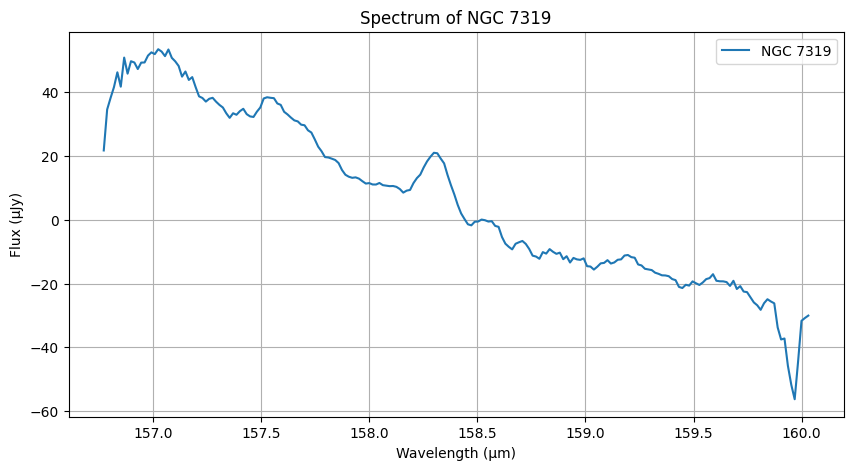

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ned_spectrum_data['wave'], ned_spectrum_data['flux'], label=galaxy_name)
plt.xlabel('Wavelength (μm)')
plt.ylabel('Flux (μJy)')
plt.title(f'Spectrum of {galaxy_name}')
plt.legend()
plt.grid(True)
plt.show()